In [ ]:
!pip install openai==0.28.1
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine

In [ ]:
import openai
import pandas as pd
import numpy as np
import gradio as gr

In [ ]:
key = '여러분들의 key값'
%env OPENAI_API_KEY = {key}

env: OPENAI_API_KEY=여러분들의 key값


In [ ]:
!wget https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv

--2023-07-09 01:08:58--  https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1319001 (1.3M) [text/plain]
Saving to: ‘finance_data.csv’

finance_data.csv    100%[===================>]   1.26M  --.-KB/s    in 0.04s   

2023-07-09 01:08:58 (30.4 MB/s) - ‘finance_data.csv’ saved [1319001/1319001]



In [ ]:
data = pd.read_csv('finance_data.csv')
data = data.drop_duplicates().reset_index(drop=True)
data.head()

,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."


In [ ]:
data['prompt'] = data['kor_sentence']
data['completion'] = data['labels']
data = data[['prompt', 'completion']]

In [ ]:
data.head()

,prompt,completion
0,"Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로...",neutral
1,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...,neutral
2,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ...",negative
3,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,positive
4,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4...",positive


In [ ]:
data.loc[1]['prompt']

'테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평방미터 이상의 면적을 단계적으로 개발할 계획이라고 성명은 밝혔다.'

In [ ]:
data.to_json('finance_data.jsonl', orient='records', force_ascii=False, lines=True)

In [ ]:
!openai tools fine_tunes.prepare_data -f "finance_data.jsonl"

Analyzing...

- Your file contains 4840 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 10 duplicated prompt-completion sets. These are rows: [1393, 2885, 2886, 2888, 3046, 3047, 3344, 3532, 3611, 3932]
- More than a third of your `prompt` column/key is uppercase. Uppercase prompts tends to perform worse than a mixture of case encountered in normal language. We recommend to lower case the data if that makes sense in your domain. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more details
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tu

In [ ]:
!openai api fine_tunes.create -t "finance_data_prepared_train.jsonl" -v "finance_data_prepared_valid.jsonl" --compute_classification_metrics --classification_n_classes 3 -m ada

Upload progress: 100% 679k/679k [00:00<00:00, 796Mit/s]
Uploaded file from finance_data_prepared_train.jsonl: file-Ci4pivR540AShOaOcX37ReGJ
Upload progress: 100% 169k/169k [00:00<00:00, 278Mit/s]
Uploaded file from finance_data_prepared_valid.jsonl: file-ykKyjxGwQ9PMUhrGCy6MkWm3
Created fine-tune: ft-여러분들의 파인 튜닝 모델 key 값
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-18 10:17:58] Created fine-tune: ft-여러분들의 파인 튜닝 모델 key 값

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-여러분들의 파인 튜닝 모델 key 값



In [ ]:
!openai api fine_tunes.follow -i ft-여러분들의 파인 튜닝 모델 key 값

[2023-06-18 10:17:58] Created fine-tune: ft-여러분들의 파인 튜닝 모델 key 값
[2023-06-18 10:39:21] Fine-tune costs $0.71
[2023-06-18 10:39:21] Fine-tune enqueued. Queue number: 0
[2023-06-18 10:39:23] Fine-tune started
[2023-06-18 10:45:43] Completed epoch 1/4

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-여러분들의 파인 튜닝 모델 key 값



In [ ]:
!openai api fine_tunes.follow -i ft-여러분들의 파인 튜닝 모델 key 값

[2023-06-18 10:17:58] Created fine-tune: ft-여러분들의 파인 튜닝 모델 key 값
[2023-06-18 10:39:21] Fine-tune costs $0.71
[2023-06-18 10:39:21] Fine-tune enqueued. Queue number: 0
[2023-06-18 10:39:23] Fine-tune started
[2023-06-18 10:45:43] Completed epoch 1/4
[2023-06-18 10:58:26] Completed epoch 3/4

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-여러분들의 파인 튜닝 모델 key 값



In [ ]:
!openai api fine_tunes.follow -i ft-여러분들의 파인 튜닝 모델 key 값

[2023-06-18 10:17:58] Created fine-tune: ft-여러분들의 파인 튜닝 모델 key 값
[2023-06-18 10:39:21] Fine-tune costs $0.71
[2023-06-18 10:39:21] Fine-tune enqueued. Queue number: 0
[2023-06-18 10:39:23] Fine-tune started
[2023-06-18 10:45:43] Completed epoch 1/4
[2023-06-18 10:58:26] Completed epoch 3/4
[2023-06-18 11:05:21] Uploaded model: ada:ft-personal-2023-06-18-11-05-21
[2023-06-18 11:05:22] Uploaded result file: file-n5DKDcz0QgKQFBDMDNnWgJIM
[2023-06-18 11:05:22] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m ada:ft-personal-2023-06-18-11-05-21 -p <YOUR_PROMPT>


In [ ]:
!openai api fine_tunes.results -i ft-여러분들의 파인 튜닝 모델 key 값 > result.csv

In [ ]:
result = pd.read_csv('result.csv')
result

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/weighted_f1_score
0,1,356,4,0.180503,0.00,0.00,0.087688,0.00,0.00,NaN,NaN
1,2,1160,8,0.085524,0.00,0.00,NaN,NaN,NaN,NaN,NaN
2,3,1836,12,0.076702,0.00,0.00,NaN,NaN,NaN,NaN,NaN
3,4,2512,16,0.063631,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,5,3188,20,0.026768,0.75,0.75,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3860,3861,2657844,15444,0.013034,0.75,0.75,NaN,NaN,NaN,NaN,NaN
3861,3862,2658648,15448,0.009581,1.00,1.00,NaN,NaN,NaN,NaN,NaN
3862,3863,2659196,15452,0.017657,0.75,0.75,NaN,NaN,NaN,NaN,NaN
3863,3864,2660032,15456,0.007654,1.00,1.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
result[result['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/weighted_f1_score
3864,3865,2660932,15460,0.006663,1.0,1.0,0.007819,0.75,0.75,0.800207,0.796707


<Axes: >

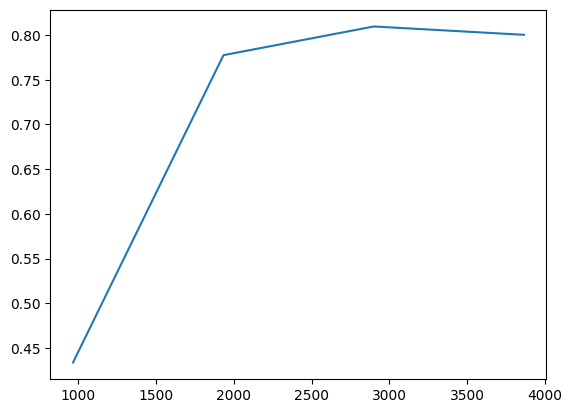

In [ ]:
result[result['classification/accuracy'].notnull()]['classification/accuracy'].plot()

In [ ]:
train = pd.read_json('finance_data_prepared_train.jsonl', lines=True)
train.head()

,prompt,completion
0,`` 정부는 그 제안을 평가하는 데 있어 매우 전문적인 접근을 해왔다. ->,positive
1,그곳은 대부분의 땅이 이미 지어졌기 때문에 매우 가치 있는 지역이다. ->,neutral
2,"pge 벨차토우는 4.44 gw의 석탄화력발전소를 운영하고 있으며, 포르툼은 공동으...",neutral
3,협약서에는 현재 회사가 있는 모든 지역에서 메르카토르의 공급망을 관리하는 전 과정이...,neutral
4,시장에서는 하이네켄이 하트월 전체 또는 일부를 판매할 것으로 예상하고 있다. ->,neutral


In [ ]:
train[train['completion']==' negative']

,prompt,completion
7,노키아의 미국 주가는 1750년 12.73달러로 3.3% 하락했다. ->,negative
9,2010년 1월부터 6월까지 희석 주당 손실은 2009년 상반기의 eur0.1에 비...,negative
20,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...,negative
24,이날 헬싱키의 주가는 소폭 하락한 12.51달러에 마감했다. ->,negative
32,퀄컴 특허기술을 사용하는 텍사스인스트루먼트칩 로열티 지급을 둘러싼 이견에 휩싸인 양...,negative
...,...,...
3832,"오늘 발표된 중간 보고서에 따르면 이 기간의 매출은 3,830만 유로에서 3,060...",negative
3833,"인쇄 사업의 외부 순매출은 43.7% 감소하였는데, 부분적으로는 2009년 12월 ...",negative
3837,노조는 회사의 초과근무 배정 정책에 대해 불만을 제기했다. ->,negative
3840,주당순이익(eps)은 0.05유로의 손실에 이르렀다. ->,negative


In [ ]:
train['completion'].value_counts()

 neutral     2273
 positive    1107
 negative     484
Name: completion, dtype: int64

In [ ]:
test = pd.read_json('finance_data_prepared_valid.jsonl', lines=True)
test.head()

,prompt,completion
0,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,positive
1,"2009-2012년 회사의 업데이트된 전략에 따르면, basware는 20% - 4...",positive
2,aspocomp의 성장기에 대한 자금 조달은 기술적으로 더 까다로운 hdi 인쇄 회...,positive
3,영업이익은 총 21.1 유로로 2007년 18.6 mn에서 증가하여 순매출의 9.7...,positive
4,텔리아소네라 tlsn은 이번 제안이 핵심 사업 보유에 대한 지분을 늘리기 위한 전략...,positive


In [ ]:
test.loc[0]['prompt']

'새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가시키고 원자재 사용을 개선하여 생산 수익성을 높일 것이다. ->'

In [ ]:
openai.api_key = key

In [ ]:
ft_model = 'ada:ft-personal-2023-06-18-11-05-21'
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][0], max_tokens=1, temperature=0)
print(res['choices'][0]['text'])

NameError: ignored

In [ ]:
def get_result(input_text):
  input_text = input_text + ' ->'
  ft_model = 'ada:ft-personal-2023-06-18-11-05-21'
  res = openai.Completion.create(model=ft_model, prompt=input_text, max_tokens=1, temperature=0)
  return res['choices'][0]['text'].strip()

In [ ]:
test = '바이톤의 순매출이 45% 감소함에 따라서 주가도 지속적으로 하락하고 있다.'

In [ ]:
print(get_result(test))

negative


In [ ]:
test = '19일 업계에 따르면 한화(000880)에어로스페이스는 올해 매출 8조 4500억 원, 영업익 6290억 원을 기록할 것으로 예상된다. 매출은 전년대비 29.2%, 영업익은 66.7% 급증할 전망이다.'

In [ ]:
print(get_result(test))

positive


In [ ]:
iface = gr.Interface(fn=get_result,
                     inputs=gr.inputs.Textbox(lines=5, placeholder='감성 분석할 뉴스를 입력해주세요.'),
                     outputs='text',
                     title="금융 뉴스 감성 분석",
                     description="금융 뉴스를 감성 분석하여 긍정(positive), 부정(negative), 중립(neutral)인지를 알려줍니다.")

iface.launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://efb9e565dd94fbc730.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
